# **BANK CUSTOMER CHURN PREDICTION**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("always")
warnings.filterwarnings("ignore")

**Dataset file**

In [2]:
data = pd.read_csv('Churn_Modelling.csv')
data.head(4)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [6]:
# Checking if our dataset contains any NULL values

data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

# **Data Analysis**

In [7]:
data['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

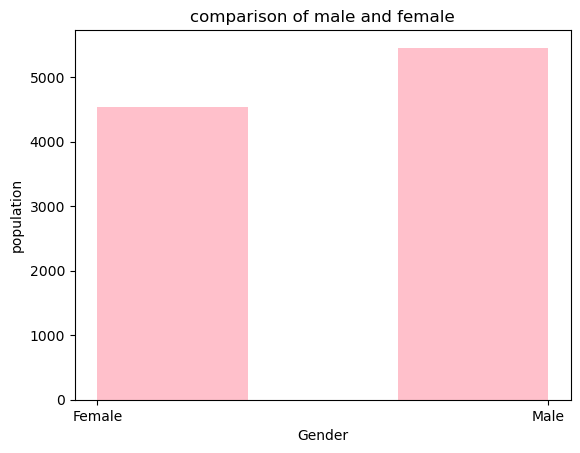

In [8]:
# Plotting the features of the dataset to see the correlation between them

plt.hist(x = data.Gender, bins = 3, color = 'pink')
plt.title('comparison of male and female')
plt.xlabel('Gender')
plt.ylabel('population')
plt.show()

In [9]:
data['Age'].value_counts()

Age
37    478
38    477
35    474
36    456
34    447
     ... 
92      2
82      1
88      1
85      1
83      1
Name: count, Length: 70, dtype: int64

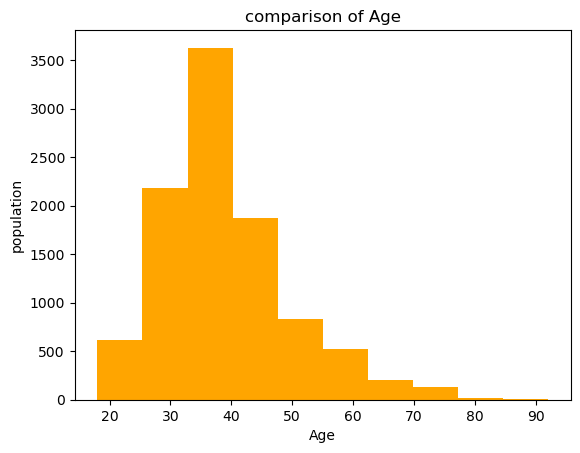

In [10]:
# comparison of age in the dataset

plt.hist(x = data.Age, bins = 10, color = 'orange')
plt.title('comparison of Age')
plt.xlabel('Age')
plt.ylabel('population')
plt.show()

In [11]:
data['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

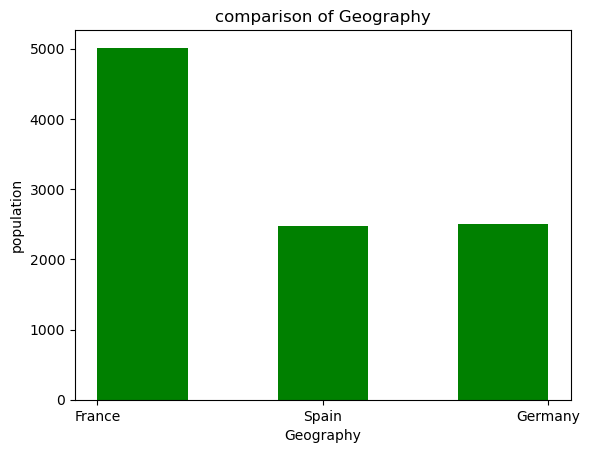

In [12]:
# comparison of geography

plt.hist(x = data.Geography, bins = 5, color = 'green')
plt.title('comparison of Geography')
plt.xlabel('Geography')
plt.ylabel('population')
plt.show()

In [13]:
data['HasCrCard'].value_counts()

HasCrCard
1    7055
0    2945
Name: count, dtype: int64

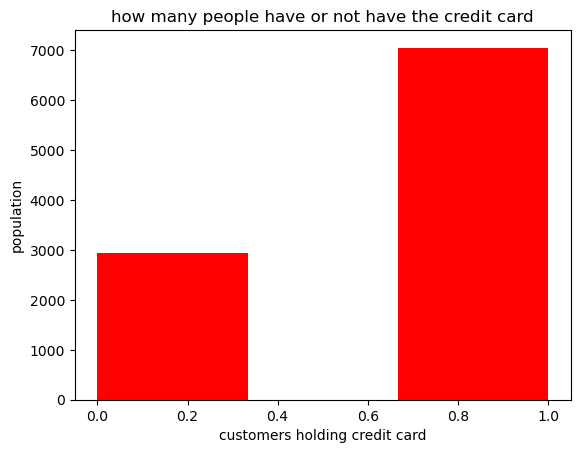

In [14]:
# comparision of how many customers hold the credit card

plt.hist(x = data.HasCrCard, bins = 3, color = 'red')
plt.title('how many people have or not have the credit card')
plt.xlabel('customers holding credit card')
plt.ylabel('population')
plt.show()

In [15]:
data['IsActiveMember'].value_counts()

IsActiveMember
1    5151
0    4849
Name: count, dtype: int64

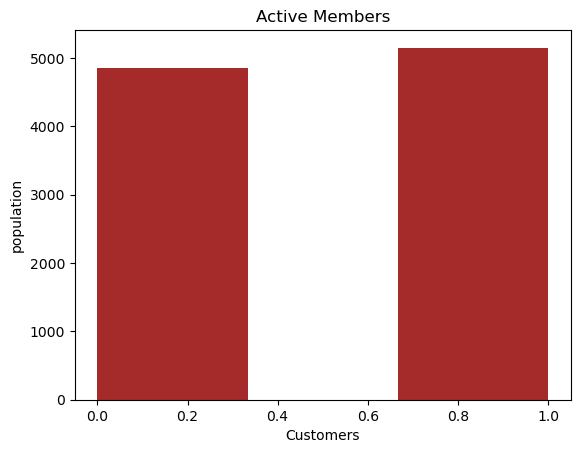

In [16]:
# How many active member does the bank have ?

plt.hist(x = data.IsActiveMember, bins = 3, color = 'brown')
plt.title('Active Members')
plt.xlabel('Customers')
plt.ylabel('population')
plt.show()

In [17]:
# calculating total balance in france, germany and spain

total_france = data.Balance[data.Geography == 'France'].sum()
total_germany = data.Balance[data.Geography == 'Germany'].sum()
total_spain = data.Balance[data.Geography == 'Spain'].sum()

print("Total Balance in France :",total_france)
print("Total Balance in Germany :",total_germany)
print("Total Balance in Spain :",total_spain)


Total Balance in France : 311332479.49
Total Balance in Germany : 300402861.38
Total Balance in Spain : 153123552.01


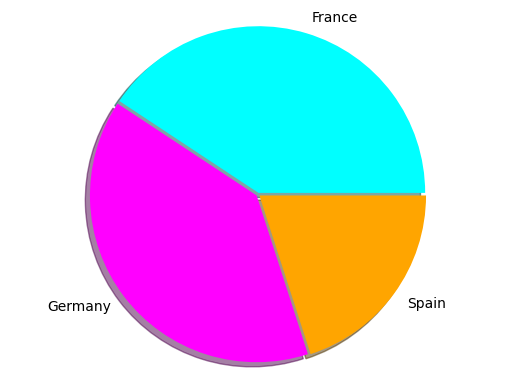

In [18]:
# plotting a pie chart

labels = 'France', 'Germany', 'Spain'
colors = ['cyan', 'magenta', 'orange']
sizes =  [311, 300, 153]
explode = [ 0.01, 0.01, 0.01]

plt.pie(sizes, colors = colors, labels = labels, explode = explode, shadow = True)

plt.axis('equal')
plt.show()

# **Data Training**

In [19]:
# Removing the unnecassary features from the dataset

data = data.drop(['CustomerId', 'Surname', 'RowNumber'], axis = 1)



print(data.columns)

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')


In [20]:
data.shape

(10000, 11)

In [21]:
# splitting the dataset into x(independent variables) and y(dependent variables)

x =  data.drop(columns=['Geography', 'Exited'])
y = data.iloc[:,10]

print(x.shape)
print(y.shape)

print(x.columns)
print(y)

(10000, 9)
(10000,)
Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary'],
      dtype='object')
0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64


In [22]:
# Encoding Categorical variables into numerical variables
# One Hot Encoding

x = pd.get_dummies(x)
x


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,True,False
1,608,41,1,83807.86,1,0,1,112542.58,True,False
2,502,42,8,159660.80,3,1,0,113931.57,True,False
3,699,39,1,0.00,2,0,0,93826.63,True,False
4,850,43,2,125510.82,1,1,1,79084.10,True,False
...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,False,True
9997,709,36,7,0.00,1,0,1,42085.58,True,False
9998,772,42,3,75075.31,2,1,0,92888.52,False,True


In [23]:
x['Gender'] = x['Gender_Female'] + x['Gender_Male']

# Drop the individual 'Gender_Female' and 'Gender_Male' columns
x.drop(columns=['Gender_Female', 'Gender_Male'], inplace=True)

In [24]:
x.shape

(10000, 9)

In [25]:
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender
0,619,42,2,0.00,1,1,1,101348.88,True
1,608,41,1,83807.86,1,0,1,112542.58,True
2,502,42,8,159660.80,3,1,0,113931.57,True
3,699,39,1,0.00,2,0,0,93826.63,True
4,850,43,2,125510.82,1,1,1,79084.10,True
...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,True
9996,516,35,10,57369.61,1,1,1,101699.77,True
9997,709,36,7,0.00,1,0,1,42085.58,True
9998,772,42,3,75075.31,2,1,0,92888.52,True


In [26]:
# splitting the data into training and testing set

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(7500, 9)
(7500,)
(2500, 9)
(2500,)


In [27]:
# Feature Scaling 
# Only on Independent Variable to convert them into values ranging from -1 to +1

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

x_train = pd.DataFrame(x_train)
x_train.head()

,0,1,2,3,4,5,6,7,8
0,-0.735507,0.015266,0.008860,0.673160,2.535034,-1.553624,-1.034460,-1.640810,0.0
1,1.024427,-0.652609,0.008860,-1.207724,0.804242,0.643657,-1.034460,-0.079272,0.0
2,0.808295,-0.461788,1.393293,-0.356937,0.804242,0.643657,0.966688,-0.996840,0.0
3,0.396614,-0.080145,0.008860,-0.009356,-0.926551,0.643657,0.966688,-1.591746,0.0
4,-0.467915,1.255605,0.701077,-1.207724,0.804242,0.643657,0.966688,1.283302,0.0


# **DATA MODEL**

**Decision Tree**

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

model = DecisionTreeClassifier() 
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuaracy :", model.score(x_test, y_test))

cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 1.0
Testing Accuaracy : 0.7716
[[1668  323]
 [ 248  261]]


**Random Forest**

In [29]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 0.9998666666666667
Testing Accuracy : 0.864
[[1907   84]
 [ 256  253]]


In [30]:
# k fold cross validatio

from sklearn.model_selection import cross_val_score

cvs = cross_val_score(estimator = model, X = x_train, y = y_train, cv = 10)
print(cvs)

[0.864      0.84266667 0.856      0.85733333 0.84       0.83866667
 0.836      0.83333333 0.844      0.84933333]


In [31]:
print("Mean Accuracy :", cvs.mean())
print("Variance :", cvs.std())

Mean Accuracy : 0.8461333333333334
Variance : 0.009636965866449408


**Logistic Regression**

In [32]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 0.8068
Testing Accuracy : 0.8056
[[1938   53]
 [ 433   76]]


**Support Vector Machine**

In [33]:
from sklearn.svm import SVC

model = SVC()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 0.8548
Testing Accuracy : 0.8564
[[1951   40]
 [ 319  190]]


In [34]:
# k fold cross validation

from sklearn.model_selection import cross_val_score

cvs = cross_val_score(estimator = model, X = x_train, y = y_train, cv = 10)
print(cvs)

[0.86133333 0.84933333 0.85466667 0.85866667 0.84533333 0.844
 0.84666667 0.84666667 0.848      0.84      ]


In [35]:
print("Mean Accuracy :", cvs.mean())
print("Variance :", cvs.std())

Mean Accuracy : 0.8494666666666667
Variance : 0.0063791326474163645


**Multi Layer Perceptron**

In [36]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(hidden_layer_sizes = (100, 100), activation ='relu', 
                      solver = 'adam', max_iter = 50)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 0.8705333333333334
Testing Accuracy : 0.8544
[[1911   80]
 [ 284  225]]


**Aritificial Neural Networks**

In [37]:
import keras
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

In [38]:
from keras.models import Sequential
from keras.layers import Dense

# Creating the model
model = Sequential()

# First hidden layer
model.add(Dense(units=8, activation='relu', kernel_initializer='uniform', input_dim=9))

# Second hidden layer
model.add(Dense(units=8, activation='relu', kernel_initializer='uniform'))

# Output layer
model.add(Dense(units=1, activation='sigmoid', kernel_initializer='uniform'))

# Compiling the NN
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fitting the model
model.fit(x_train, y_train, batch_size=10, epochs=49)


Epoch 1/49
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7905 - loss: 0.5653
Epoch 2/49
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7948 - loss: 0.4416
Epoch 3/49
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7977 - loss: 0.4300
Epoch 4/49
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8230 - loss: 0.4206
Epoch 5/49
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8214 - loss: 0.4325
Epoch 6/49
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8298 - loss: 0.4200
Epoch 7/49
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8278 - loss: 0.4255
Epoch 8/49
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8360 - loss: 0.4157
Epoch 9/49
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8355 - loss: 0.4142
Epoch 10/49
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8341 - loss: 0.4113
Epoch 11/49
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8349 - loss: 0.4206
Epoch 12/49
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

In [39]:
data.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [40]:
'''
predicting if the costumer having following information will leave the bank or not ?

Geography : france
Age = 50
Credit score = 850
Tenure = 4
Balance = 150000
Number of Products = 5
Gender = Female
Has Credit Card = yes
Is Active Member = yes
Estimated Salary = 85000
'''

new_prediction = model.predict(sc.transform(np.array([[850, 50, 4, 150000, 5, 1, 1, 85000,1]])))

new_prediction = (new_prediction > 0.5 )
print(new_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
[[ True]]


In [41]:
import joblib

In [49]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Save the trained model and scaler to files
joblib.dump(model, 'logistic_regression_model1.pkl')
joblib.dump(scaler, 'standard_scaler1.pkl')

print("Model and scaler saved successfully.")

Model and scaler saved successfully.


# PROFILING

In [43]:
import pandas_profiling
from ydata_profiling import ProfileReport

In [44]:
profile=ProfileReport(data)

In [46]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# EXPLORATORY DATA ANALYSIS (EDA)

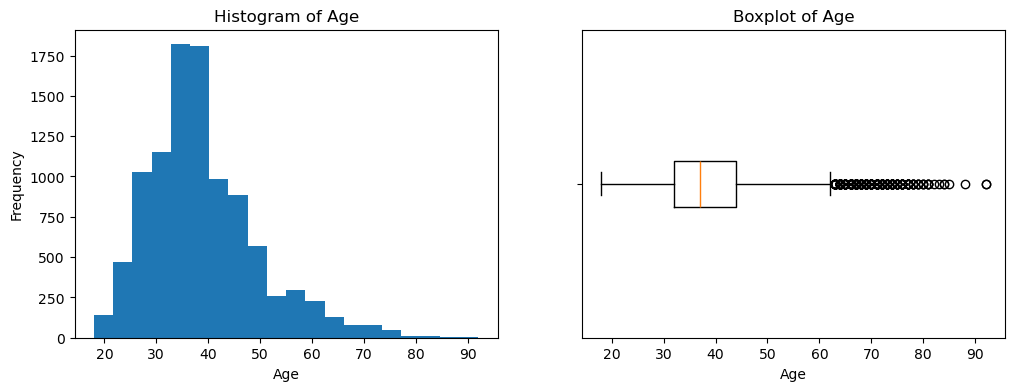

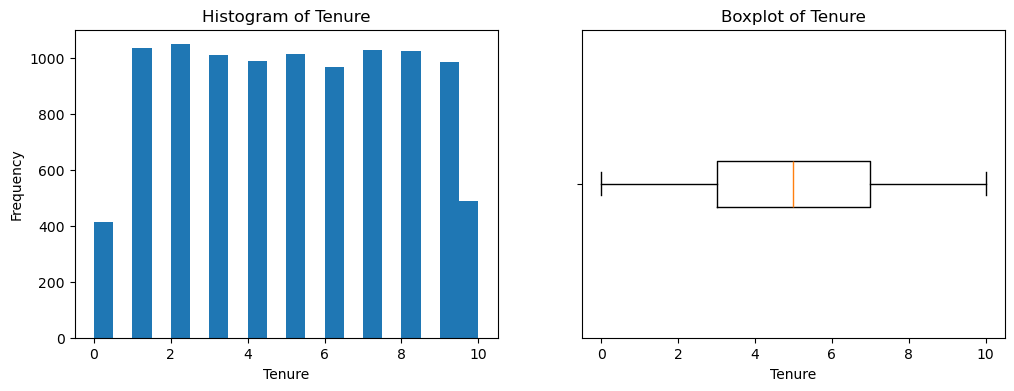

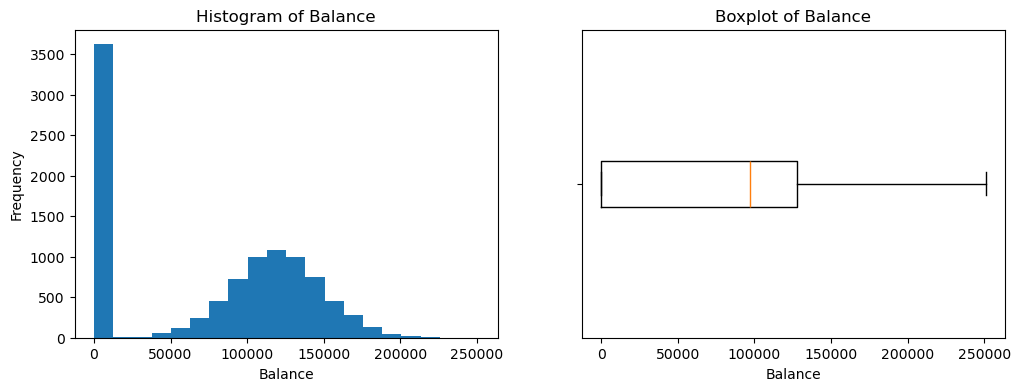

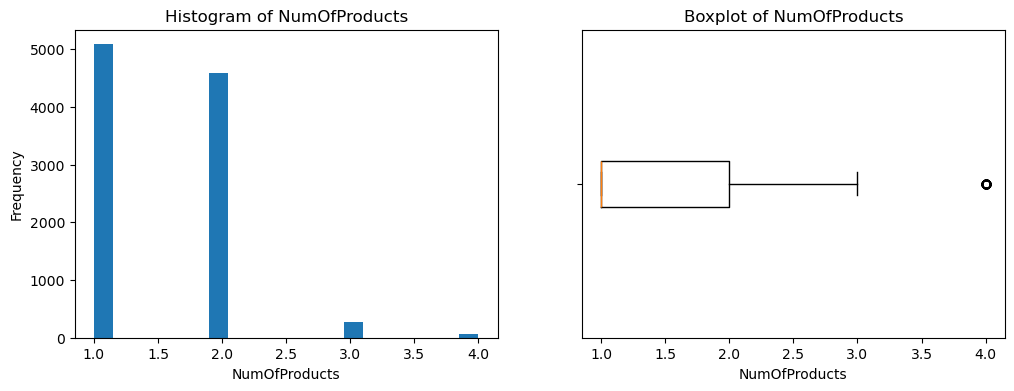

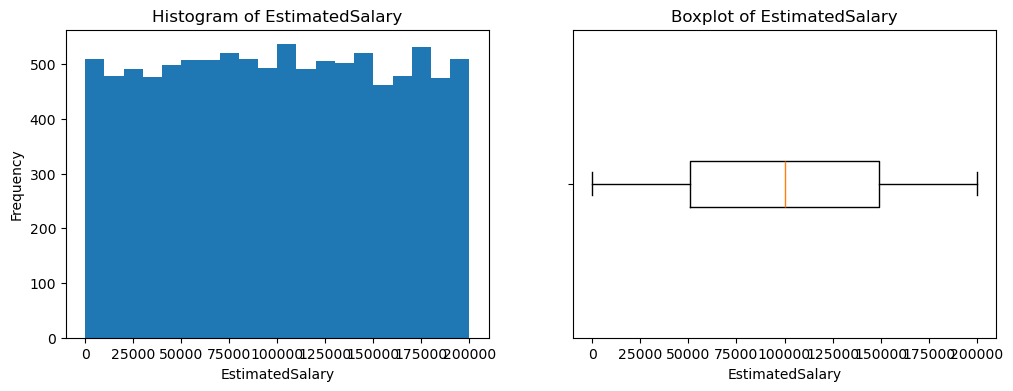

In [45]:
# EDA for numerical features
numerical_features = ['Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
for feature in numerical_features:
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))
    axs[0].hist(data[feature], bins=20)
    axs[0].set_title(f'Histogram of {feature}')
    axs[0].set_xlabel(feature)
    axs[0].set_ylabel('Frequency')

    axs[1].boxplot(data[feature], vert=False)
    axs[1].set_title(f'Boxplot of {feature}')
    axs[1].set_xlabel(feature)
    axs[1].set_yticklabels('')
    plt.show()

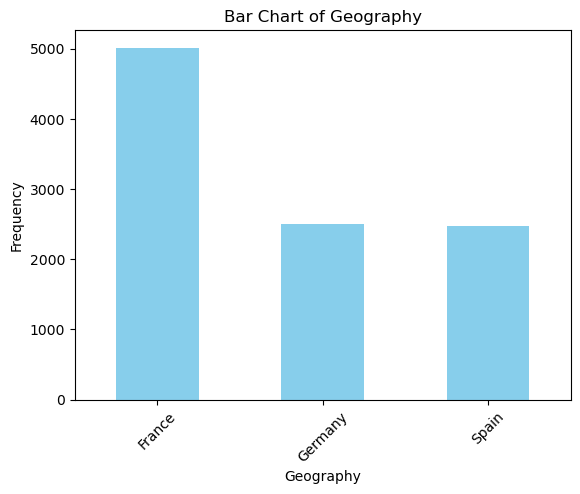

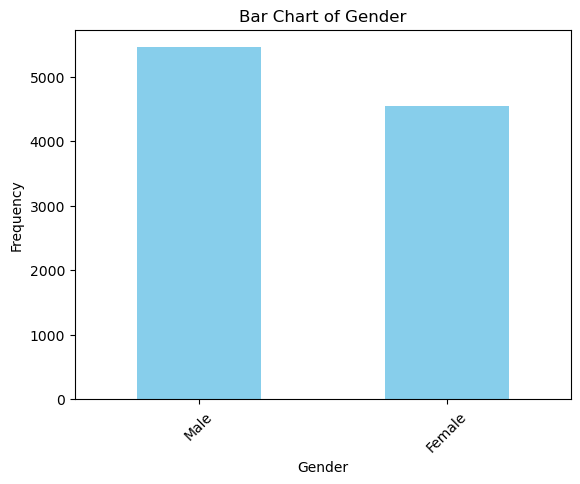

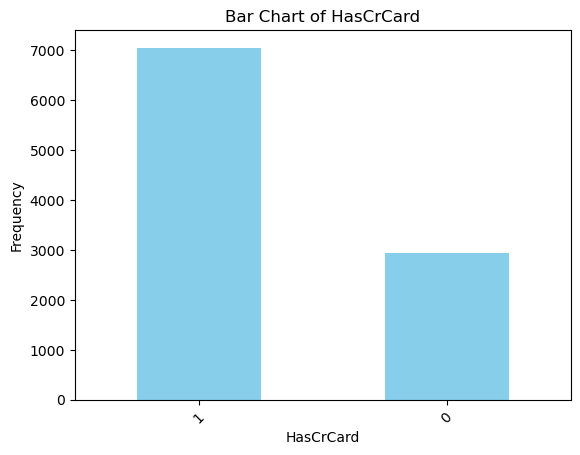

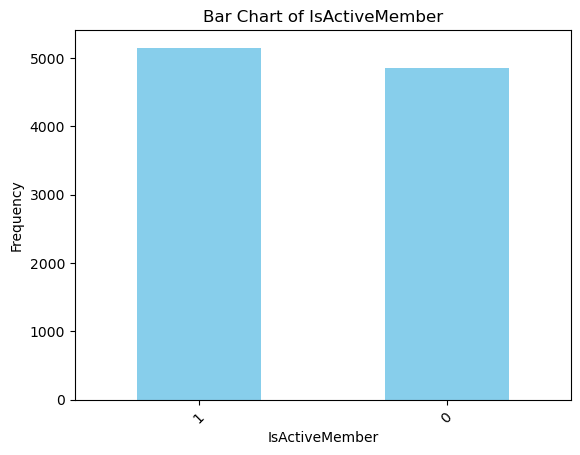

In [46]:
# EDA for categorical features
categorical_features = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']
for feature in categorical_features:
    feature_counts = data[feature].value_counts()
    feature_counts.plot(kind='bar', color='skyblue')
    plt.title(f'Bar Chart of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()

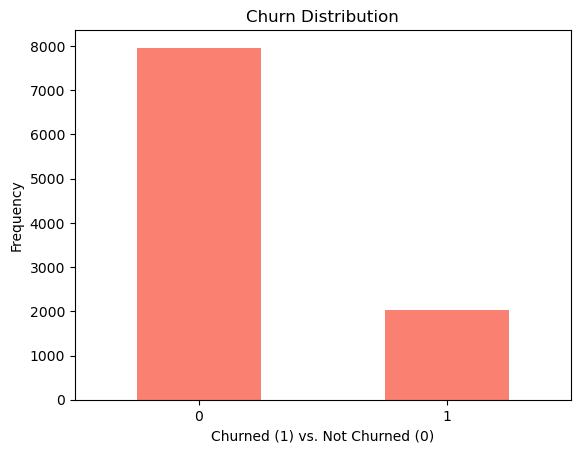

In [48]:
# EDA for target variable
churn_counts = data['Exited'].value_counts()
churn_counts.plot(kind='bar', color='salmon')
plt.title('Churn Distribution')
plt.xlabel('Churned (1) vs. Not Churned (0)')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()